# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

---

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        weather_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_json['coord']['lat']
        city_lng = weather_json['coord']['lon']
        city_max_temp = weather_json['main']['temp_max']
        city_humidity = weather_json['main']['humidity']
        city_clouds = weather_json['clouds']['all']
        city_wind = weather_json['wind']['speed']
        city_country = weather_json['sys']['country']
        city_date = weather_json['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | aswan
Processing Record 2 of Set 1 | labytnangi
Processing Record 3 of Set 1 | sabha
Processing Record 4 of Set 1 | leo
Processing Record 5 of Set 1 | labuan
Processing Record 6 of Set 1 | puerto natales
Processing Record 7 of Set 1 | valparaiso
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | neiafu
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | enewetak
Processing Record 13 of Set 1 | west island
Processing Record 14 of Set 1 | baki
Processing Record 15 of Set 1 | kalabo
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | avarua
Processing Record 18 of Set 1 | bredasdorp
Processing Record 19 of Set 1 | dalbandin
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | barro alto
Processing Record 22 of Set 1 | misratah
Processing Record 23 of Set 1 | tai

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,aswan,24.0934,32.9070,98.04,14,11,4.92,EG,1719559160
1,labytnangi,66.6572,66.4183,53.71,52,100,12.10,RU,1719559161
2,sabha,27.0377,14.4283,88.75,16,0,13.31,LY,1719559163
3,leo,11.1000,-2.1000,78.64,74,100,8.86,BF,1719559164
4,labuan,5.2767,115.2417,88.16,70,20,3.44,MY,1719559165


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,aswan,24.0934,32.9070,98.04,14,11,4.92,EG,1719559160
1,labytnangi,66.6572,66.4183,53.71,52,100,12.10,RU,1719559161
2,sabha,27.0377,14.4283,88.75,16,0,13.31,LY,1719559163
3,leo,11.1000,-2.1000,78.64,74,100,8.86,BF,1719559164
4,labuan,5.2767,115.2417,88.16,70,20,3.44,MY,1719559165


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

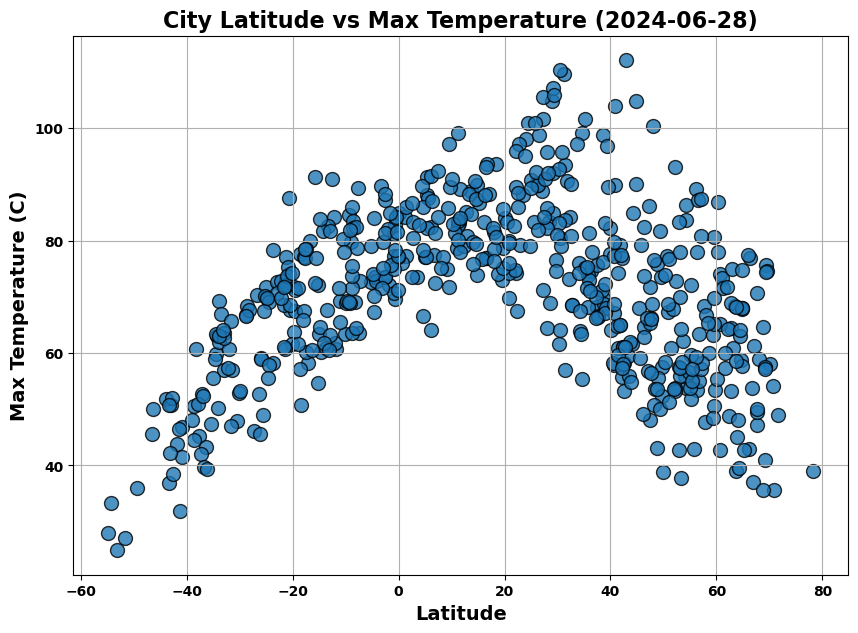

In [9]:
# Build scatter plot for latitude vs. temperature
curr_date = pd.to_datetime('today').date()
latitude = city_data_df['Lat']
max_temp = city_data_df['Max Temp']
fig1, ax1 = plt.subplots(figsize=(10,7))
plt.scatter(latitude, max_temp, s=100, edgecolor="black", linewidth=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature ({curr_date})", fontsize=16)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Max Temperature (C)', fontsize=14)
plt.grid()
          
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

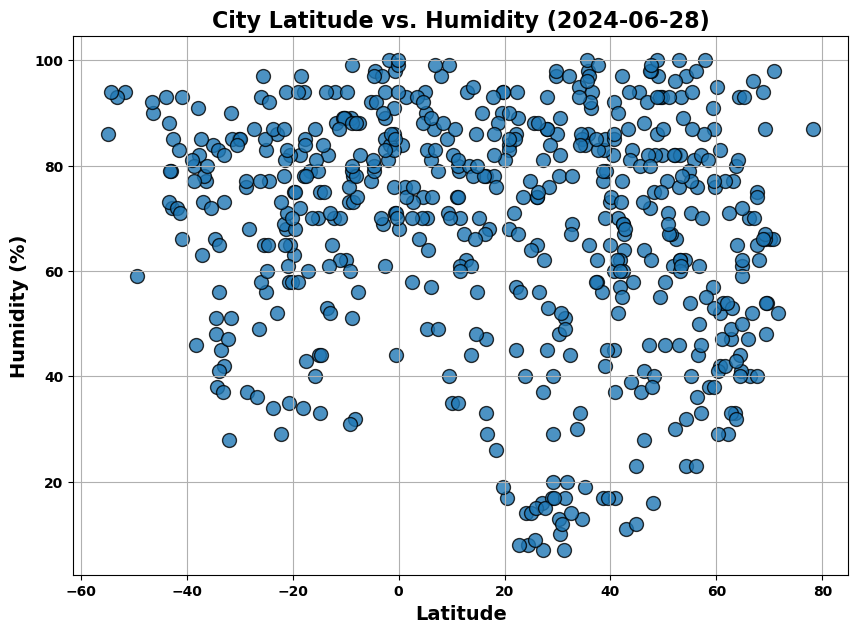

In [10]:
# Build the scatter plots for latitude vs. humidity
curr_date = pd.to_datetime('today').date()
latitude = city_data_df['Lat']
humid = city_data_df['Humidity']
fig1, ax1 = plt.subplots(figsize=(10,7))
plt.scatter(latitude, humid, s = 100, edgecolor="black", linewidth=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({curr_date})", fontsize=16)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Humidity (%)', fontsize=14)
plt.grid()
          
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

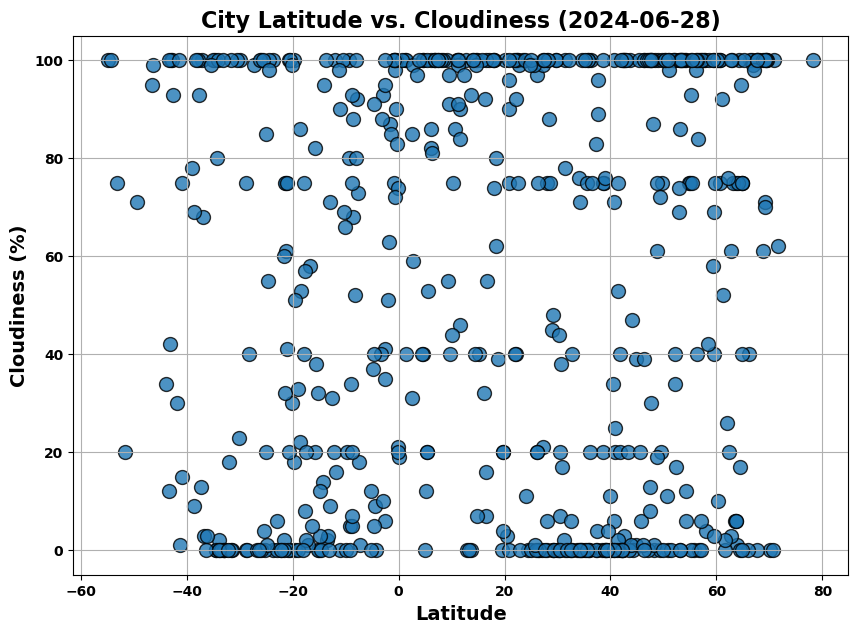

In [11]:
# Build the scatter plots for latitude vs. cloudiness
curr_date = pd.to_datetime('today').date()
latitude = city_data_df['Lat']
clouds = city_data_df['Cloudiness']
fig1, ax1 = plt.subplots(figsize=(10,7))
plt.scatter(latitude, clouds, s=100, edgecolor="black", linewidth=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({curr_date})", fontsize=16)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Cloudiness (%)', fontsize=14)
plt.grid()
          
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

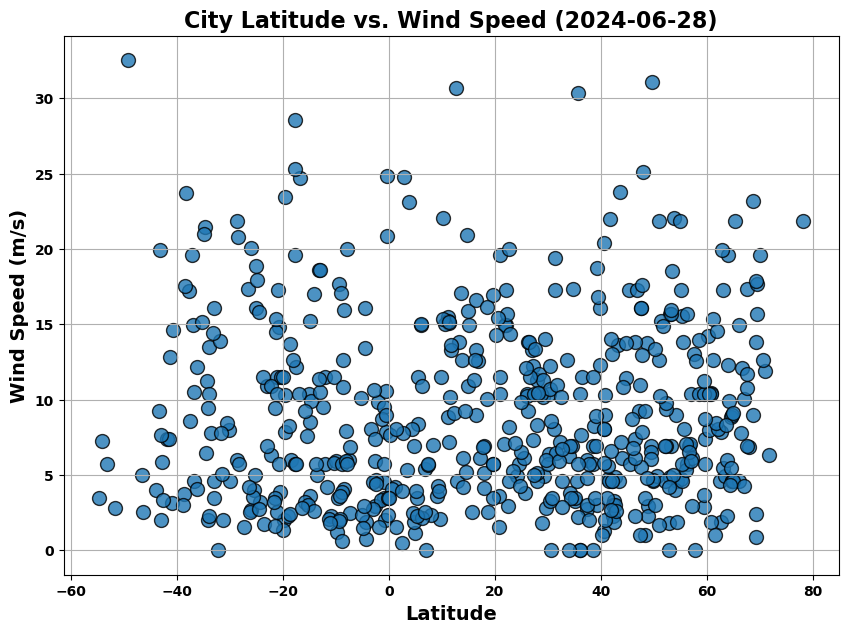

In [12]:
# Build the scatter plots for latitude vs. wind speed
curr_date = pd.to_datetime('today').date()
latitude = city_data_df['Lat']
wind = city_data_df['Wind Speed']
fig1, ax1 = plt.subplots(figsize=(10,7))
plt.scatter(latitude, wind, s=100, edgecolor="black", linewidth=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({curr_date})", fontsize=16)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Wind Speed (m/s)', fontsize=14)
plt.grid()
        
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_axis, y_axis, x_label, y_label, hemisphere, text_coordinates, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    
    # Retrieve regression values
    regress_values = x_axis * slope + intercept
    
    # Line equation
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Print r square value
    print(f"The r-squared is: {rvalue**2}")
    
    # Build the scatter plots 

    fig1, ax1 = plt.subplots(figsize=(10,7))
    plt.scatter(x_axis, y_axis, s=100, marker="o", alpha=0.8)
    plt.plot(x_axis,regress_values,"r-")  
    
    # Incorporate the other graph properties
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label} ({curr_date})",fontsize = 16)
    plt.xlabel(x_label,fontsize=14)
    plt.ylabel(y_label,fontsize=14)
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,aswan,24.0934,32.9070,98.04,14,11,4.92,EG,1719559160
1,labytnangi,66.6572,66.4183,53.71,52,100,12.10,RU,1719559161
2,sabha,27.0377,14.4283,88.75,16,0,13.31,LY,1719559163
3,leo,11.1000,-2.1000,78.64,74,100,8.86,BF,1719559164
4,labuan,5.2767,115.2417,88.16,70,20,3.44,MY,1719559165


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,puerto natales,-51.7236,-72.4875,27.03,94,20,2.77,CL,1719559037
6,valparaiso,-33.0393,-71.6273,57.00,73,0,3.44,CL,1719558937
7,ushuaia,-54.8000,-68.3000,28.06,86,100,3.44,AR,1719558904
8,neiafu,-18.6500,-173.9833,77.59,82,22,13.69,TO,1719559170
9,edinburgh of the seven seas,-37.0676,-12.3116,52.68,63,100,14.97,SH,1719559171


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.3555142331112759


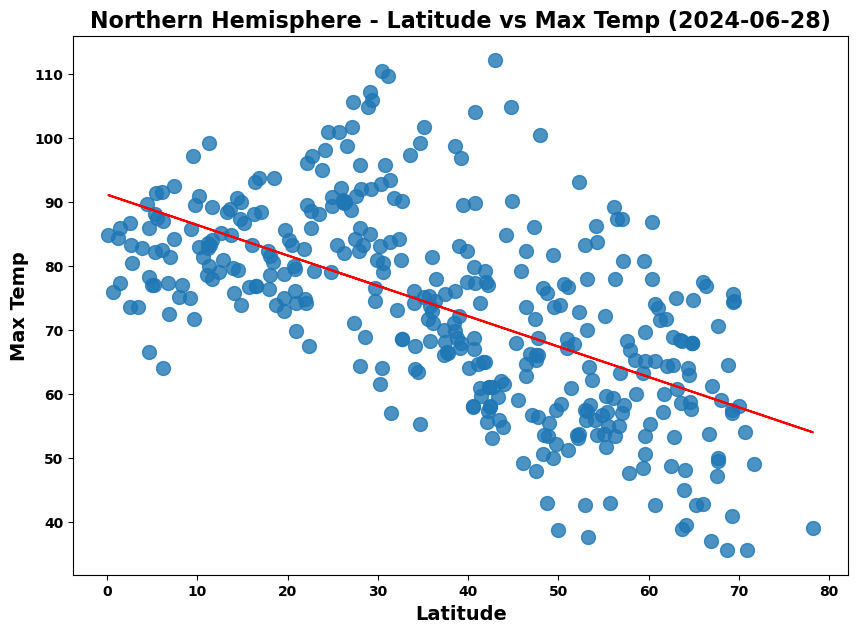

In [16]:
# Linear regression on Northern Hemisphere
# Build scatter plot for latitude vs. temperature
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Max Temp']
plot_linear_regression(x_axis, y_axis, 'Latitude', 'Max Temp', 'Northern', (10, 10))
          
# Save Figure
plt.savefig("../output_data/fig1_northern_regression.png")
# Show plot
plt.show()

The r-squared is: 0.6399468739107494


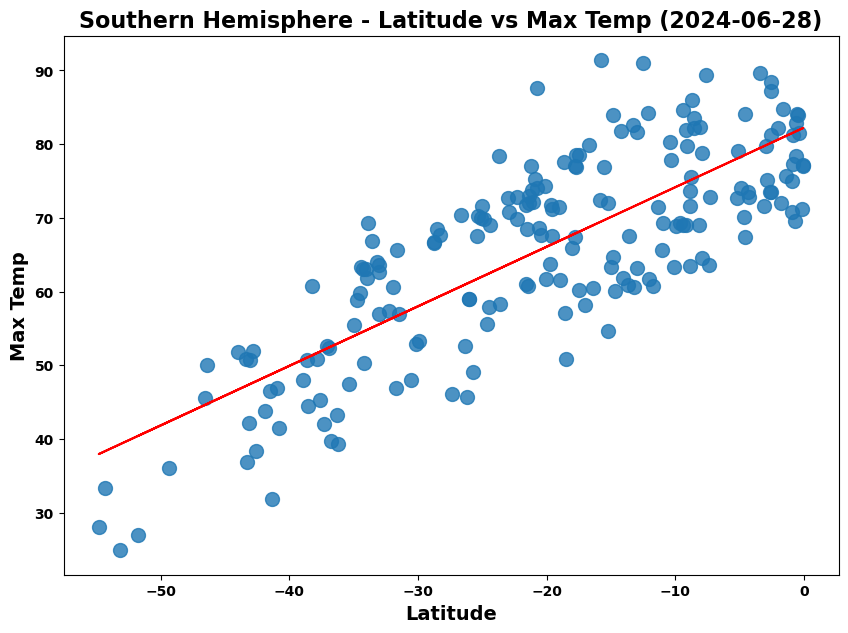

In [17]:
# Linear regression on Southern Hemisphere
# Build scatter plot for latitude vs. temperature
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Max Temp']
plot_linear_regression(x_axis, y_axis, 'Latitude', 'Max Temp', 'Southern', (-20, 100))
          
# Save Figure
plt.savefig("../output_data/fig1_southern_regression.png")
# Show plot
plt.show()

**Discussion about the linear relationship:** In the sampling from the Northern Hempisphere there is a positive moderate correlation between temperature and latitude. In the sampling from the Southern Hempisphere there is little to no positive correlation between the temperature and latitude. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.00703991976601069


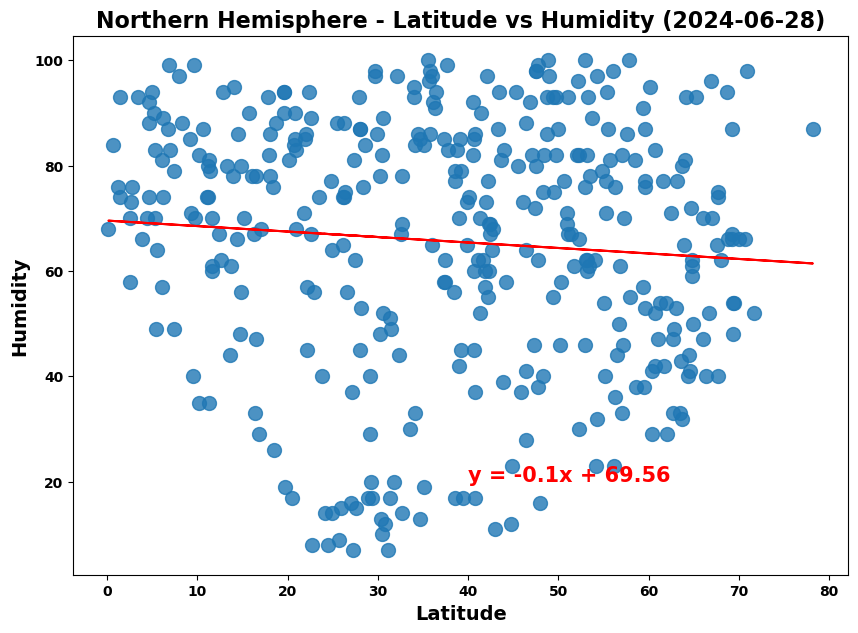

In [18]:
# Northern Hemisphere
# Build the scatter plots for latitude vs. humidity
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Humidity']
plot_linear_regression(x_axis, y_axis, 'Latitude', 'Humidity', 'Northern', (40, 20))
          
# Save Figure
plt.savefig("../output_data/fig2_northern_regression.png")
# Show plot
plt.show()

The r-squared is: 0.012259939470718082


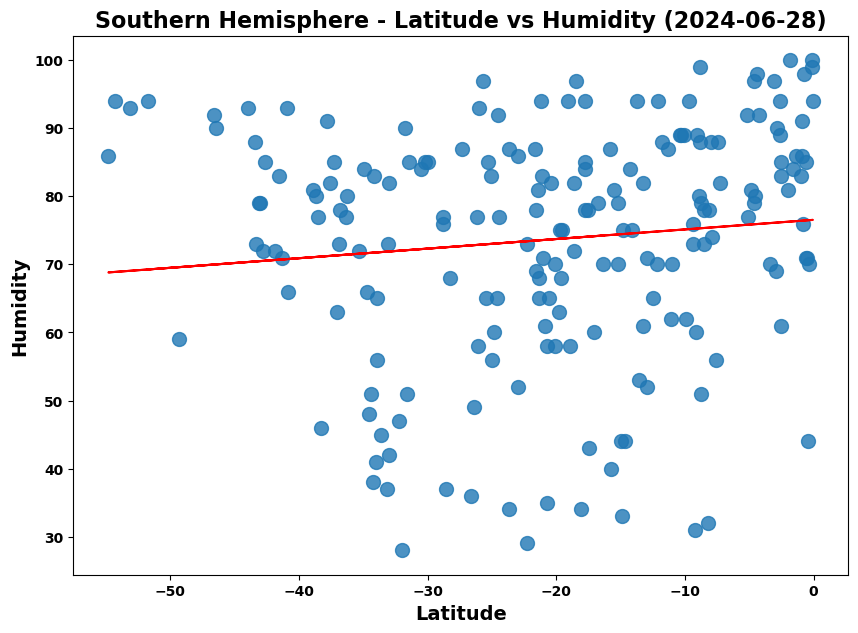

In [19]:
# Southern Hemisphere
# Build the scatter plots for latitude vs. humidity
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Humidity']
plot_linear_regression(x_axis, y_axis, 'Latitude', 'Humidity', 'Southern', (-20, 20))
          
# Save Figure
plt.savefig("../output_data/fig2_southern_regression.png")
# Show plot
plt.show()

**Discussion about the linear relationship:** In the sampling from the Northern Hempisphere there is a weak positive correlation between humidity and latitude. In the sampling from the Southern Hempisphere there is no correlation between humidity and latitude. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.0013840767636318005


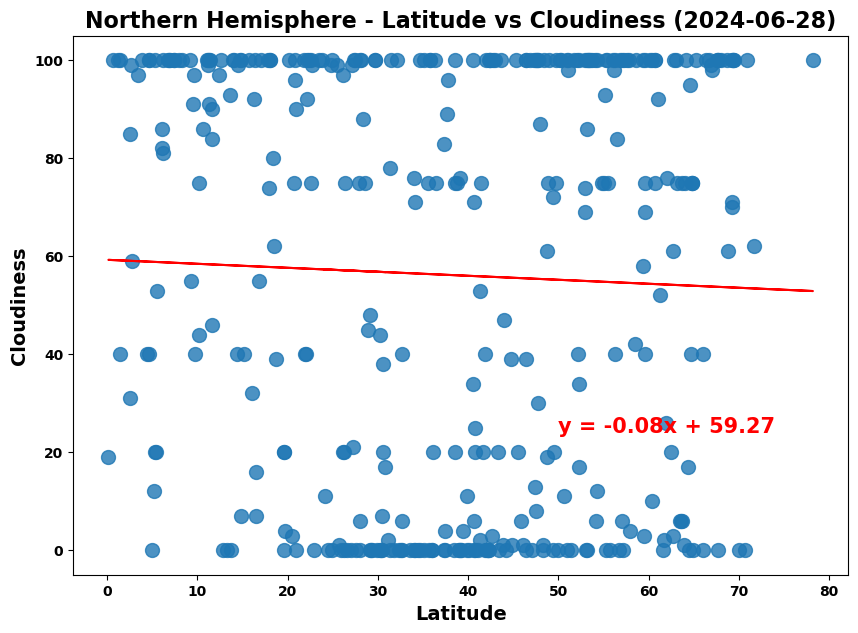

In [20]:
# Northern Hemisphere
# Build the scatter plots for latitude vs. cloudiness
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Cloudiness']
plot_linear_regression(x_axis, y_axis, 'Latitude', 'Cloudiness', 'Northern', (50, 24))
          
# Save Figure
plt.savefig("../output_data/fig3_northern_regression.png")
# Show plot
plt.show()

The r-squared is: 9.13411590522004e-05


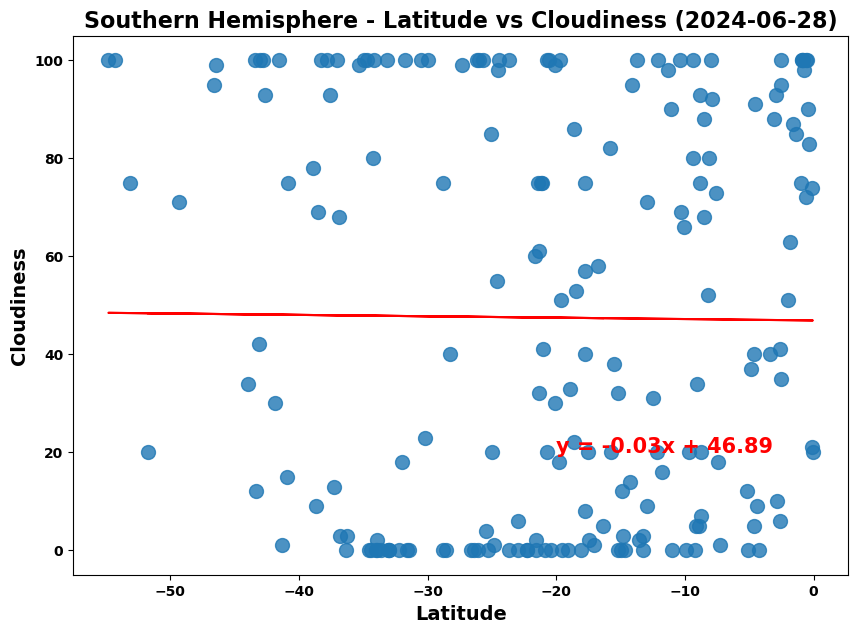

In [21]:
# Southern Hemisphere
# Build the scatter plots for latitude vs. cloudiness
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Cloudiness']
plot_linear_regression(x_axis, y_axis, 'Latitude', 'Cloudiness', 'Southern', (-20, 20))
          
# Save Figure
plt.savefig("../output_data/fig3_southern_regression.png")
# Show plot
plt.show()

**Discussion about the linear relationship:** There is no correlation between latitude and cloudiness in the sample of both hemispheres. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.002326909640893263


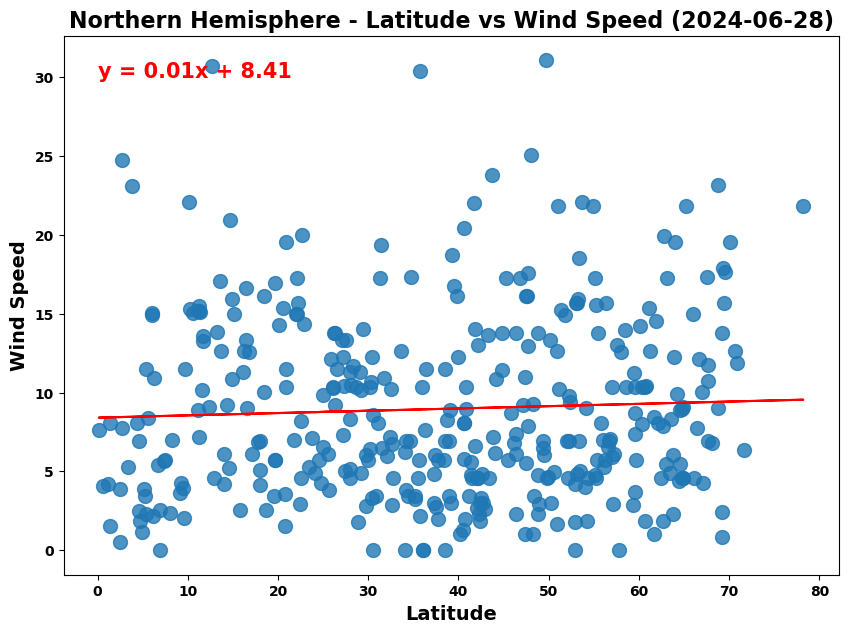

In [22]:
# Northern Hemisphere
# Build the scatter plots for latitude vs. wind speed
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Wind Speed']
plot_linear_regression(x_axis, y_axis, 'Latitude', 'Wind Speed', 'Northern', (0, 30))
          
# Save Figure
plt.savefig("../output_data/fig4_northern_regression.png")
# Show plot
plt.show()

The r-squared is: 0.015548906069145598


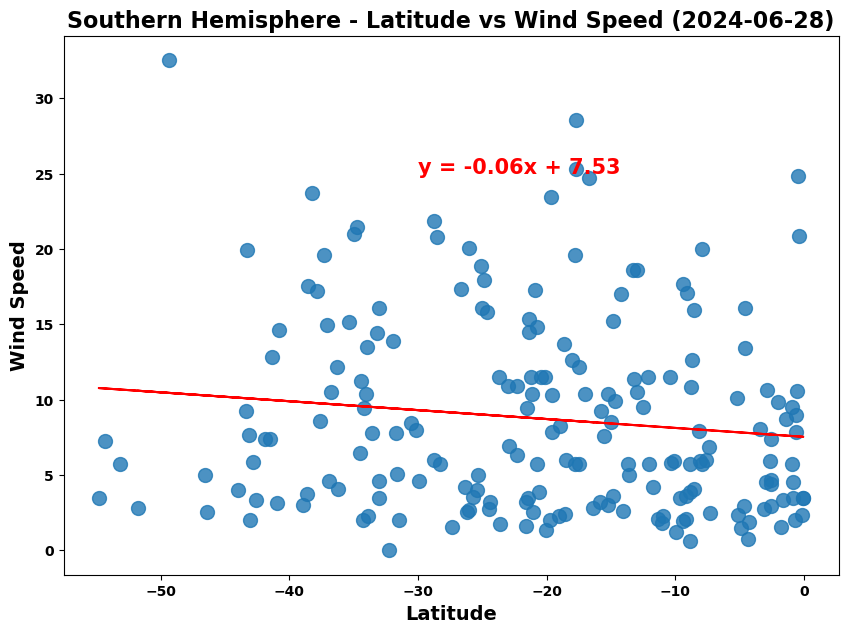

In [23]:
# Southern Hemisphere
# Build the scatter plots for latitude vs. wind speed
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Wind Speed']
plot_linear_regression(x_axis, y_axis, 'Latitude', 'Wind Speed', 'Southern', (-30, 25))
          
# Save Figure
plt.savefig("../output_data/fig4_southern_regression.png")
# Show plot
plt.show()

**Discussion about the linear relationship:** In the sampling from the Northern Hempisphere there is a very weak correlation between humidity and latitude. In the sampling from the Southern Hempisphere there is a very weak correlation between humidity and latitude.